In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [26]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['Number of O-rings at risk on a given flight', 'Number experiencing thermal distress', 'Launch temperature (degrees F)', 'Leak-check pressure (psi)', 'Temporal order of flight']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)


In [27]:
dataset = raw_dataset.copy()

In [28]:
dataset = dataset.dropna()
dataset.tail()

,,,Number of O-rings at risk on a given flight,Number experiencing thermal distress,Launch temperature (degrees F),Leak-check pressure (psi),Temporal order of flight
27.0,4,140.0,86.0,2790.0,15.6,82,1
44.0,4,97.0,52.0,2130.0,24.6,82,2
32.0,4,135.0,84.0,2295.0,11.6,82,1
28.0,4,120.0,79.0,2625.0,18.6,82,1
31.0,4,119.0,82.0,2720.0,19.4,82,1


In [29]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)


In [30]:
X_train = train_dataset.copy()
X_test = test_dataset.copy()

y_train = X_train.pop('Number experiencing thermal distress')
y_test = X_test.pop('Number experiencing thermal distress')


In [31]:
from sklearn.linear_model import LinearRegression as sk_LinearRegression

regr = sk_LinearRegression()
regr.fit(X_train, y_train)

baseline = regr.score(X_test, y_test)
print("Non-private baseline R2 score: %.2f" % baseline)


Non-private baseline R2 score: 0.86


In [32]:
from diffprivlib.models import LinearRegression

dp_regr = LinearRegression()
dp_regr.fit(X_train, y_train)

baseline2 = dp_regr.score(X_test, y_test)
print("private baseline R2 score: %.2f" % baseline2)


private baseline R2 score: -125873.91
/home/tarik/.local/lib/python3.8/site-packages/diffprivlib/models/linear_regression.py:253: PrivacyLeakWarning: Bounds parameters haven't been specified, so falling back to determining bounds from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `bounds_X` and `bounds_y`.
  warnings.warn(


In [33]:
epsilons = np.logspace(-3, 2, 500)
accuracy = []

for epsilon in epsilons:
    dp_regr = LinearRegression(epsilon=epsilon)
    dp_regr.fit(X_train, y_train)
    accuracy.append(dp_regr.score(X_test, y_test))

ite-packages/diffprivlib/models/linear_regression.py:253: PrivacyLeakWarning: Bounds parameters haven't been specified, so falling back to determining bounds from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `bounds_X` and `bounds_y`.
  warnings.warn(
/home/tarik/.local/lib/python3.8/site-packages/diffprivlib/models/linear_regression.py:253: PrivacyLeakWarning: Bounds parameters haven't been specified, so falling back to determining bounds from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `bounds_X` and `bounds_y`.
  warnings.warn(
/home/tarik/.local/lib/python3.8/site-packages/diffprivlib/models/linear_regression.py:253: PrivacyLeakWarning: Bounds parameters haven't been specified, so falling back to determining bounds from the data.
This will result in additional privacy leakage. To ensure differential privacy with n

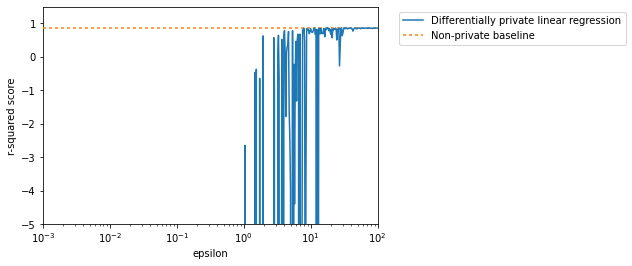

In [34]:
plt.semilogx(epsilons, accuracy, label="Differentially private linear regression", zorder=10)
plt.semilogx(epsilons, baseline * np.ones_like(epsilons), dashes=[2,2], label="Non-private baseline", zorder=5)
plt.xlabel("epsilon")
plt.ylabel("r-squared score")
plt.ylim(-5, 1.5)
plt.xlim(epsilons[0], epsilons[-1])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')